# Numerical Investigations to Burger's Equation

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.testing as test

In [18]:
import crank_nicholson as cn
import finite_difference as fd
import analytic_sol as an_sol

In [ ]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

Burger's equation is a non-linear PDE that allows one to develop intuition regarding the physical mechanisms of both advection and diffusion. The equation in one dimension is given by

\\[\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}.\\]

This can be thought of as a simplified Navier-Stokes equation with no body force terms or pressure gradient. $\nu$ represents the kinematic viscosity and thus the term $\nu (\partial^2 u/\partial x^2)$ represents the diffusion of viscous forces. The term $u (\partial u / \partial x)$ is the advection term, as seen in the Navier-Stokes equation. Often it is of interest to solve the problem when $\nu = 0$ - this is referred to as the inviscid Burger's equation, and is often expressed as

\\[\frac{\partial u}{\partial t} + \frac{1}{2}\frac{\partial}{\partial x}u^2=0.\\]

To develop intuition regarding the role of each type of transport, the viscid Burger's equation is first considered. The explicit finite difference method will be derived and implemented, though as with most explicit methods, the stability varies due to the accumulation of error with each step. Due to this, two other solvers were implemented, the first being a higher order explicit finite difference method and the second being an implicit method with Crank Nicholson time stepping. 

### Explicit Finite Difference Method

The explicit method is obtained by using a forward-difference on the time derivative, meaning

\\[\frac{\partial u}{\partial t} \approx \frac{u(x,t+\Delta t) - u(x,t)}{\Delta t} = \frac{u_{i,j+1} - u_{i,j}}{\Delta t}.\\]

As seen in Landau, Paez and Bordeianu, the central-difference approximation is used on the diffusion term, resulting in

\\[\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x+\Delta x,t) - 2u(x,t) + u(x-\Delta x,t)}{(\Delta x)^2} 
= \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2}.\\]


There are a couple of different first order approaches to approximate the advection term. The first method uses a central-difference to approximate $\partial u / \partial x$. 

\\[\frac{\partial u}{\partial x} \approx \frac{u(x+\Delta x/2,t) - u(x-\Delta x / 2,t)}{\Delta x} = \frac{(u_{i+1,j}+u_{i,j})/2 - (u_{i-1,j}+u_{i,j})/2}{\Delta x} = \frac{u_{i+1,j} -u_{i-1,j}}{2\Delta x}\\]

Using this approximation, an explicit finite difference method for Burger's equation is given by 

\\[\begin{align} \frac{u_{i,j+1} - u_{i,j}}{\Delta t} + \frac{u_{i,j}(u_{i+1,j} -u_{i-1,j})}{2\Delta x} &= \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} \\ 
\Rightarrow \frac{u_{i,j+1} - u_{i,j}}{\Delta t} &= -\frac{u_{i,j}(u_{i+1,j} -u_{i-1,j})}{2\Delta x} + \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} \\
\Rightarrow u_{i,j+1} &= u_{i,j} + \Delta t\left( -\frac{u_{i,j}(u_{i+1,j} -u_{i-1,j})}{2\Delta x} + \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2}\right)\end{align} \\]

Ok, now that we have an algorithm, let's see what the solutions look like for different values of $\nu$ for $0 \leq x,t \leq 1$ with the initial conditions $u(x,t=0) = sin(\pi x)$

Text(0.5, 0, 't')

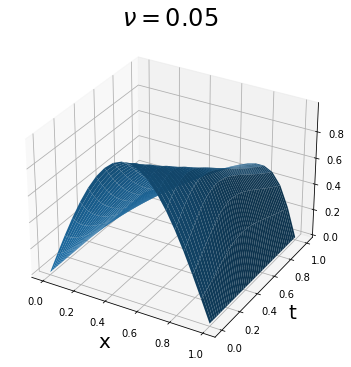

In [19]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=0.05,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 0.05$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

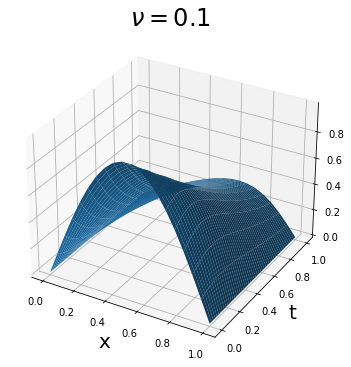

In [20]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=0.1,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 0.1$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

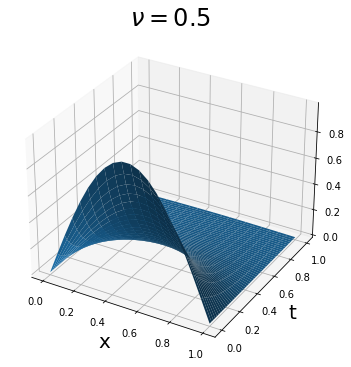

In [21]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=0.5,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 0.5$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

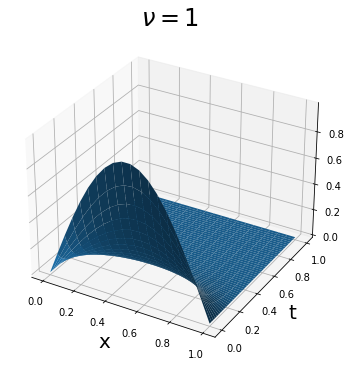

In [22]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=1,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 1$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

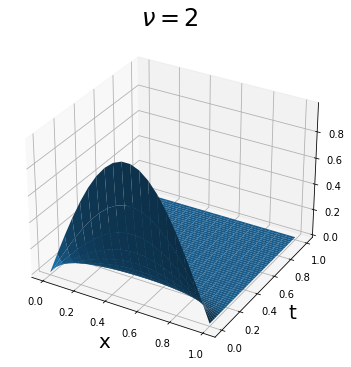

In [23]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=2,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 2$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

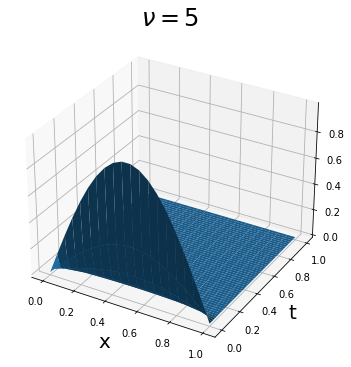

In [24]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=5,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 5$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

# Higher Order Explicit Finite Difference Method

An easy way to increase the accuracy of our numerical solver is to use higher order expressions for the approximation of the derivatives. These expressions are given by:

\\[\frac{\partial u}{\partial x} \approx \frac{-u(x + 2\Delta x,t) + 8u(x + \Delta x,t) - 8u(x - \Delta x,t) + u(x - 2\Delta x,t)}{12\Delta x} = \frac{-u_{i+2,j} + 8u_{i+1,j} - 8u_{i-2,j} + u_{i-2,j}}{12\Delta x}\\]

\\[\frac{\partial^2 u}{\partial x^2} \approx \frac{-u(x + 2\Delta x,t) + 16u(x + \Delta x,t) - 30u(x,t) + 16u(x - \Delta x,t) - u(x - 2\Delta x,t)}{12\Delta x^2} = \frac{-u_{i+2,j} + 16u_{i+1,j} - 30u_{i,j} + 16u_{i-1,j} - u_{i-2,j}}{12\Delta x^2}\\]

This works great everywhere... except near the endpoints since we need data outside of the grid. To fix this, we must instead use the forward and backward difference formulas. The forward difference formulas are given by:

\\[\frac{\partial u}{\partial x} \approx \frac{-25u(x,t) + 48u(x + \Delta x,t) - 36u(x + 2\Delta x,t) + 16u(x + 3\Delta x,t) - 3u(x + 4\Delta x,t)}{12\Delta x} = \frac{-25u_{i,j} + 48u_{i+1,j} - 36u_{i+2,j} + 16u_{i+3,j} - 3u_{i+4,j}}{12\Delta x}\\]

\\[\frac{\partial^2 u}{\partial x^2} \approx \frac{45u(x,t) - 154u(x + \Delta x,t) + 314u(x + 2\Delta x,t) - 156u(x + 3\Delta x,t) + 61u(x + 4\Delta x,t) - 10u(x + 5\Delta x,t)}{12\Delta x^2} = \frac{45u_{i,j} - 154u_{i+1,j} + 314u_{i+2,j} - 156u_{i+3,j} + 61u_{i+4,j} - 10u_{i+5,j}}{12\Delta x^2}\\]

The backward difference formulas are similar.

Using the previous equations allows us to implement an algorithm with higher accuracy than the simple algorithm we began with. This should allow us to reduce the number or grid points and the number of time points (allowing the program to run faster) without losing accuracy.

### Analytic Solutions for the Viscid Burger's Equation
From Inan and Bahadir, a more complex numerical method was used to solve Burger's equation, though the analytic solutions provide a way to compare the with the numerical solutions obtained from the different solvers. From Table 3, 

| x    | t    | $\nu=1.0$ | $\nu=.01$  |
|------|------|-----------|------------|
| 0.25 | 0.10 | 0.253638  | 0.566328   |
|      | 0.15 | 0.156601  | 0.512148   |
|      | 0.20 | 0.096442  | 0.466583   |
|      | 0.25 | 0.059218  | 0.427995   |
|      |      |           |            |
| 0.50 | 0.10 | 0.371577  | 0.947414   |
|      | 0.15 | 0.226824  | 0.900098   |
|      | 0.20 | 0.138473  | 0.848365   |
|      | 0.25 | 0.084538  | 0.796762   |
|      |      |           |            |
| 0.75 | 0.10 | 0.272582  | 0.860134   |
|      | 0.15 | 0.164369  | 0.922756   |
|      | 0.20 | 0.099435  | 0.961891   |
|      | 0.25 | 0.060347  | 0.974689   |

which is for the problem with the following initial condition and boundary conditions

\\[u(x,0) = \mbox{sin}(\pi x) \qquad u(0,t)=u(1,t)=0\\]

with the analytical solution being given by

\\[u(x,t) = 2 \pi \nu \frac{\sum_{n=1}^\infty a_n \mbox{exp}(-n^2 \pi^2 \nu t)n \mbox{sin}(n\pi x)}{a_0 + \sum_{n=1}^\infty a_n \mbox{exp}(-n^2 \pi^2 \nu t)\mbox{cos}(n \pi x)}\\]

where 

\\[\begin{align*} 
a_0 &= \int_0^1 \mbox{exp}\left(-(1-\mbox{cos}(\pi x) )/(2 \pi \nu)\right)dx  \\
a_n &= 2\int_0^1 \mbox{exp}\left(-(1-\mbox{cos}(\pi x) )/(2 \pi \nu)\right)\mbox{cos}(n \pi x)dx.
\end{align*}\\]

Below this analytic solution is tested, guaranteeing that this is an accurate test to use for comparison with the numerical solutions.

In [ ]:
x = np.array([0.25, 0.50, 0.75])
t = np.array([0.1, 0.15, 0.2, 0.25])

# test for nu = 1
nu = 1.

u_an = an_sol.IB_analytic_sum(nu, x, t, 5, problem=1)
u_table = np.array([[0.253638, 0.156601, 0.096442, 0.059218],
                    [0.371577, 0.226824, 0.138473, 0.084538],
                    [0.272582, 0.164369, 0.099435, 0.060347]])

test.assert_array_almost_equal(u_an, u_table, decimal=6)

# test for nu = 0.01
nu = 0.01 

u_an = an_sol.IB_analytic_sum(nu, x, t, 40, problem=1)
u_table = np.array([[0.566328, 0.512148, 0.466583, 0.427995],
                    [0.947414, 0.900098, 0.848365, 0.796762],
                    [0.860134, 0.922756, 0.961891, 0.974689]])

test.assert_array_almost_equal(u_an, u_table, decimal = 3)

For the comparisons, it is important to note that as $\nu \to 0$, the number of terms kept in the sum needs to increase to maintain precision. Inan and Bahadir provide a second analytic solution as well. The function containing the analytic solution can test this second problem by choosing `problem = 2`. The boundary conditions and initial condition are given by 

$$u(x,0) =4x(1-x) \qquad u(0,t)=u(1,t)=0$$

and the coefficients in the sum are 


$$a_0=\int_0^1\mbox{exp}(-x^2(3-2x)/(3\nu)dx \qquad \mbox{and} \qquad a_n = 2 \int_0^1 \mbox{exp}(-x^2(3-2x)/(3\nu))\mbox{cos}(n\pi x)dx.$$

From Table 4, 

| x    | t    | $\nu=1.0$ | $\nu=.01$ |
|------|------|-----------|------------|
| 0.25 | 0.10 | 0.261480  | 0.607363   |
|      | 0.15 | 0.161478  | 0.549421   |
|      | 0.20 | 0.099470  | 0.499828   |
|      | 0.25 | 0.061088  | 0.457413   |
|      |      |           |            |
| 0.50 | 0.10 | 0.383422  | 0.956007   |
|      | 0.15 | 0.234055  | 0.914426   |
|      | 0.20 | 0.142888  | 0.867136   |
|      | 0.25 | 0.087233  | 0.818337   |
|      |      |           |            |
| 0.75 | 0.10 | 0.281573  | 0.886767   |
|      | 0.15 | 0.169738  | 0.938437   |
|      | 0.20 | 0.102655  | 0.969741   |
|      | 0.25 | 0.062290  | 0.979469   |

Again, the analytic solution is compared against the values they obtained to make sure the correct solution is output.

In [ ]:
x = np.array([0.25, 0.50, 0.75])
t = np.array([0.1, 0.15, 0.2, 0.25])

# test for nu = 1
nu = 1.

u_an = an_sol.IB_analytic_sum(nu, x, t, 5, problem=2)
u_table = np.array([[0.261480, 0.161478, 0.099470, 0.061088],
                    [0.383422, 0.234055, 0.142888, 0.087233],
                    [0.281573, 0.169738, 0.102655, 0.062290]])

test.assert_array_almost_equal(u_an, u_table, decimal=6)

# test for nu = 0.01
nu = 0.01 

u_an = an_sol.IB_analytic_sum(nu, x, t, 50, problem=2)
u_table = np.array([[0.607363, 0.549421, 0.499828, 0.457413],
                    [0.956007, 0.914426, 0.867136, 0.818337],
                    [0.886767, 0.938437, 0.969741, 0.979469]])

test.assert_array_almost_equal(u_an, u_table, decimal = 3)

## Crank-Nicholson Time-Step

As we saw, the explicit finite different method is only stable when $\Delta t$ is small compared to $(\Delta x)^2$. To implement this, the Cole-Hopf transformation is applied. This says that there is a function $\phi(x,t)$ such that

$$u(x,t) = -2 \nu \frac{1}{\phi}\frac{\partial \phi}{\partial x}.$$

This then allows us to write 

$$\begin{align*}
\frac{\partial u}{\partial t} &= -2\nu \frac{\partial }{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial t}\right) \\
\frac{1}{2}\frac{\partial u^2}{\partial x} &= 2\nu^2 \frac{\partial}{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial x}\right)^2 \\
\frac{\partial^2 u}{\partial x^2} &= 2\nu\frac{\partial}{\partial x}\left(\left(\frac{1}{\phi}\frac{\partial \phi}{\partial x}\right)^2 - \frac{1}{\phi}\frac{\partial^2 \phi}{\partial x^2}\right)
\end{align*}$$

meaning 

$$\begin{align*}-2\nu \frac{\partial }{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial t}\right) + 2\nu^2 \frac{\partial}{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial x}\right)^2&=  2\nu^2\frac{\partial}{\partial x}\left(\left(\frac{1}{\phi}\frac{\partial \phi}{\partial x}\right)^2 - \frac{1}{\phi}\frac{\partial^2 \phi}{\partial x^2}\right) \\
\Rightarrow  \frac{\partial }{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial t}\right) & = \nu\frac{\partial}{\partial x}\left( \frac{1}{\phi}\frac{\partial^2 \phi}{\partial x^2}\right).\end{align*}$$

By integrating both sides, we then obtain

$$\frac{1}{\phi}\frac{\partial \phi}{\partial t}  = \nu \frac{1}{\phi}\frac{\partial^2 \phi}{\partial x^2} + g(t).$$

But for now we are only interested in problems with time-independent boundary conditions, so we set $g(t)=0$. After applying this transformation, it is now apparent that the problem reduces to the diffusion equation

$$\frac{\partial \phi}{\partial t}  = \nu \frac{\partial^2 \phi}{\partial x^2}.$$

If we begin by considering problems in which $u(0,t) = u(L,t) = 0$, we see that the boundary conditions on $phi$ require $\phi_x(0,t) = \phi_x(L,t) = 0$. Following Kadalbajoo and Awasthi, applying the Crank-Nicholson time-stepping method with Neumann boundary conditions leads to the following system of equations:

$$\begin{align*}
(1+\alpha)\phi_{0,j+1} -\alpha \phi_{1,j+1} &= \alpha \phi_{1,j} + (1-\alpha)\phi_{0,j} \\
-\frac{\alpha}{2}\phi_{i-1,j+1} + (1+\alpha)\phi_{i,j+1}-\frac{\alpha}{2}\phi_{i+1,j+1} &=
\frac{\alpha}{2}\phi_{i-1,j} + (1-\alpha)\phi_{i,j}+\frac{\alpha}{2}\phi_{i+1,j} \qquad \mbox{when }1 \leq i \leq M\\
-\alpha\phi_{M-1,j+1} + (1+\alpha)\phi_{M,j+1} &= \alpha \phi_{M-1,j}+(1-\alpha) \phi_{M,j}
\end{align*}$$

where $\alpha = \nu \Delta t/ (\Delta x)^2$. This system of equations can then be written using tridiagonal matrices.
$$\begin{pmatrix}
            1+\alpha          & -\alpha           & 0                & ...\\
            -\frac{\alpha}{2} & 1+\alpha          &-\frac{\alpha}{2} & ... \\
            \vdots            & \vdots            &   \vdots         & ... \\
            0                 & -\frac{\alpha}{2} & 1+\alpha         &-\frac{\alpha}{2} \\
            0                 & 0                 &-\alpha           & 1+\alpha \\
   \end{pmatrix}
   \begin{pmatrix}
   \phi_{0,j+1} \\
   \phi_{1,j+1} \\
   \vdots    \\
   \phi_{M-1,j+1}\\
   \phi_{M,j+1}\\
   \end{pmatrix}
   =
   \begin{pmatrix}
            1-\alpha          & \alpha            & 0                & ...\\
            \frac{\alpha}{2}  & 1-\alpha          &\frac{\alpha}{2}  & ... \\
            \vdots            & \vdots            &   \vdots         & ... \\
            0                 &  \frac{\alpha}{2} & 1-\alpha         & \frac{\alpha}{2} \\
            0                 & 0                 & \alpha           & 1-\alpha \\
   \end{pmatrix}
   \begin{pmatrix}
   \phi_{0,j} \\
   \phi_{1,j} \\
   \vdots    \\
   \phi_{M-1,j}\\
   \phi_{M,j}\\
   \end{pmatrix}
   $$

To solve this system of equations, the method outlined in section 20.4.1 of Landau, et al. is used. A function was written to generate the above tridiagonal matrices, and a tridiagonal matrix solver was written. Before using this in the PDE solver, a couple checks were run to ensure that the solver works correctly. 

### Testing the functions used in Crank Nicholson solver

The following demonstrates that the matrix initializer function creates the expected matrices.

In [25]:
# check the matrix initializer function for alpha = 0.2 and 5x5
# in dimension
tri_diag_A = np.array([
                       [1.2, -0.2, 0, 0, 0], 
                       [-0.1, 1.2, -0.1, 0, 0], 
                       [0, -0.1, 1.2, -0.1, 0],
                       [0, 0, -0.1, 1.2, -0.1],
                       [0, 0, 0, -0.2, 1.2]
            ])
tri_diag_B = np.array([
                       [0.8, 0.2, 0, 0, 0], 
                       [0.1, 0.8, 0.1, 0, 0], 
                       [0, 0.1, 0.8, 0.1, 0],
                       [0, 0, 0.1, 0.8, 0.1],
                       [0, 0, 0, 0.2, 0.8]                        
            ])

A, B = cn.init_matrices(0.2, 5)
print(A); print(B)

test.assert_equal(tri_diag_A, A)
test.assert_equal(tri_diag_B, B)

[[ 1.2 -0.2  0.   0.   0. ]
 [-0.1  1.2 -0.1  0.   0. ]
 [ 0.  -0.1  1.2 -0.1  0. ]
 [ 0.   0.  -0.1  1.2 -0.1]
 [ 0.   0.   0.  -0.2  1.2]]
[[0.8 0.2 0.  0.  0. ]
 [0.1 0.8 0.1 0.  0. ]
 [0.  0.1 0.8 0.1 0. ]
 [0.  0.  0.1 0.8 0.1]
 [0.  0.  0.  0.2 0.8]]


The tridiagonal matrix solver also needs to be tested. Numpy has a matrix solver that will be used to check the accuracy of the tridiagonal solver.

In [ ]:
# initialize a tridiagonal array. need to specify data type to 
# avoid incorrect calculations
A1 = np.array([
    [1,2,0,0], [3, 4, 5, 0], [0, 6 ,7 ,8], [0, 0, 9, 10]], dtype = float)

A2 = np.array([
    [1, 2, 0, 0, 0], [3, 4, 5, 0, 0], [0, 6 ,7 ,8, 0], [0, 0, 2, 2, 2],
    [0, 0, 0, 9, 10]], dtype = float)

b1 = np.array([-1, 2, -1, 1], dtype = float)
b2 = np.array([0, 2, 4, -5, 9], dtype = float)

# solution using numpy matrix solver
x_numpy1 = np.linalg.solve(A1, b1)
x_numpy2 = np.linalg.solve(A2, b2)

# solution using tridiagonal matrix solver
x_tridiag1 = cn.solve_tri_diag(A1, b1)
x_tridiag2 = cn.solve_tri_diag(A2, b2)

test.assert_array_almost_equal(x_numpy1, x_tridiag1, decimal = 10)
test.assert_array_almost_equal(x_numpy2, x_tridiag2, decimal = 10)

The solver only solves problems that satisfy the boundary conditions $u(0,t)=u(L,t) = 0$. Since the solver solves for $\phi(x,t)$ in order to get $u(x,t)$, the initial condition $u(x,0)$ must be transformed to $\phi(x,0)$. This function will be tested over the interval $(0,3)$ with 

$$u(x,0)= \frac{x(x-3)}{1+x^2}.$$

The analytic solution is obtained via 

$$\frac{-u}{2\nu}=\frac{1}{\phi}\frac{\partial \phi}{\partial x} \quad \Rightarrow \quad \int \frac{d\phi}{\phi} = \frac{-1}{2\nu}\int u(0,x)dx \quad \Rightarrow \quad \phi(x,0) = \mbox{exp}\left(\frac{-1}{2\nu}\int u(0,x)dx\right)$$

which for this problem comes out to be 

$$\phi(x,0) = \mbox{exp}\left( -(x-\mbox{arctan}x -\frac{3}{2}\mbox{log}(1+x^2))/2\nu \right).$$

In [ ]:
x = np.linspace(0,3,150)

# this transformation solver uses odeint, so a function
# rather than an array is passed to it
u0 = lambda x: x * (x-3) / (1+x**2)

nu =1 

phi0_n = cn.transform_u0(u0, x, nu)
phi0_a = np.exp(-(x- np.arctan(x) - 1.5 * np.log(1+x**2))/ nu/2)

test.assert_array_almost_equal(phi0_n, phi0_a, decimal=6)

Once $\phi(x,t)$ has been calculated, the Cole-Hopf transformation is used to obtain $u(x,t)$. This transformation is tested here. The solver assumes $u(0,t) = u(L,t) = 0$, so the testing will ignore the boundaries. Let $\phi(x,t)=x^2+t^2+1$. Then $\phi_x(x,t) =2x$ and

$$u(x,t) = -2 \nu \frac{\phi_x}{\phi} = \frac{-4 \nu x}{x^2+t^2+1}$$

In [ ]:
# since the transformation approximates phi_x with a forward
# difference, a finer grid results in a more accurate transformation
x = np.arange(0,1.025,.025)
t = np.arange(0,1.5,0.5)
dx = x[1] - x[0]
nu = 1.

lx = len(x); lt = len(t)
phi = np.zeros((lx, lt))
u_an = np.zeros_like(phi)

# initialize phi(x,t) and the expected solution
for i in range(len(x)):
    for j in range(len(t)):
        phi[i,j] = x[i]**2 + t[j]**2 + 1
        u_an[i,j] = -4 * nu * x[i]/ (x[i]**2 + t[j]**2 + 1)

In [ ]:
u_trans = cn.transform_phi(phi, dx, nu)

In [ ]:
# don't compare the boundaries
test.assert_array_almost_equal(u_an[1:(lx-1)], u_trans[1:(lx-1)], decimal=10)

In [ ]:
leg1 = ['t = 0','t = 0.5','t = 1']

plt.plot(x[1:(lx-1)],u_trans[1:(lx-1)], linewidth = 2)
plt.plot(x[1:(lx-1)],u_an[1:(lx-1)], marker = '+', color = 'k',
         linestyle = '')

plt.xlabel('x')
plt.xlim(x[1],x[lx-2])
plt.legend(leg1)

So we see that the converter from $\phi(x,t)$ from $u(x,t)$ satisfies this test. 

Since the solver itself is a heat equation solver, we can test it independently to make sure it produces the correct solution to the heat equation. But it should be noted that since $u(0,t)=u(L,t)=0$ is assumed, this implies $\phi_x(0,t)=\phi_x(0,L)=0$ must be the boundary conditions for $\phi$. A good test is then 

$$\phi(x,0) = \mbox{cos}(\pi x) \quad \mbox{and} \quad \phi(x,t) = \mbox{cos}(\pi x) \mbox{exp}(-\pi^2 t)$$

In [ ]:
x = np.arange(0,1.001,.001)
t = np.arange(0,1.001,.001)
nu = 1
phi_0 = np.cos(np.pi * x)

# numerical solution
phi = cn.solve_PDE(phi_0, x, t , nu)

In [ ]:
fig, axs = plt.subplots(2)
diff = []
for i in range(len(t)):
    if i%200 == 0:
        
        an_sol = np.cos(np.pi * x) * np.exp(-np.pi**2 * t[i])
        phi_i = phi[:,i]
        diff.append([abs(phi_i-an_sol).max(),t[i]])
        
        axs[0].plot(x, an_sol, color = 'k', linestyle = '--', linewidth = 2.5)
        axs[0].plot(x, phi_i, label = 't='+str(t[i]))
        axs[1].plot(x, abs(phi_i-an_sol))
        
        axs[0].legend(loc='center', bbox_to_anchor=(1.2,0))
        
        axs[0].set_ylabel('$\phi(x,t)$')
        axs[1].set_ylabel('absolute error')

In [ ]:
print('Absolute error:', diff)
print('Max: %.3e'%diff[0][0], 't:', diff[0][1])
print('Min: %.3e'%diff[-1][0], 't:', diff[-1][1])
# print('Min:', max())

Thus the heat equation solver works as expected. As time went on, the absolute error decreased. 

# Comparison of the error of the different methods

To get an idea of the error of each of these methods, we've decided to compare each method at $t = 0.2$ for $\nu = 1$ because the function is relatively large there. Normally for error comparison of a PDE we would either like to look at the error at the final time or the error at a range of times. These are not practical here because of the nature of the problem. We can't look at the error at the final time because the function decays to 0 as time increases. This means that any numerical method will be close to the analytic solution there. Also, we've decided to compare the error at only one point in time because running the analytic solution with enough terms to ensure that level of accuracy takes too long. As a compromise we've decided to look at the solutions at $t = 0.2$ because the function is relatively large and because it has deviated substantially from the initial conditions by that point. 

We'll begin by looking at the error for the most basic numerical method with a grid of 20 positions and 10000 time points.

Text(0, 0.5, 'u(x,t = 0.2)')

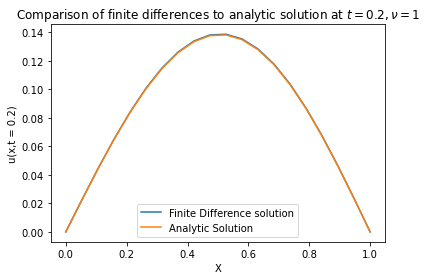

In [26]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=1,grid=grid,time=time,initial_conditions=initial)

analytic_soln_2 = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 20, problem = 1)
analytic_soln_2 = [i[0] for i in analytic_soln_2]

plt.pyplot.plot(grid,u[int(10000*0.2)],label="Finite Difference solution")
plt.pyplot.plot(grid,analytic_soln_2,label="Analytic Solution")
plt.pyplot.legend()
plt.pyplot.title(r"Comparison of finite differences to analytic solution at $t = 0.2, \nu = 1$")
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

In the plot above, we can't really see what is going on because the numerical and analytic solutions are so close to each other (they lie on top of each other in the plot). Let's instead look at the magnitude of the difference.

Text(0, 0.5, 'u(x,t = 0.2)')

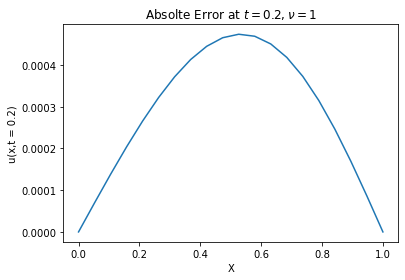

In [27]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

plt.pyplot.plot(grid,np.abs(u[int(10000*0.2)]-analytic_soln_2))
plt.pyplot.title(r'Absolte Error at $t = 0.2, \nu = 1$')
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

The plot above shows that the numerical solution is within 0.0005 of the analytic solution at all points for $t = 0$. That is equivalent to a relative error of only 0.36%. Let's see what happens when we increase the number of grid points in the numerical solution.

Text(0, 0.5, 'L2 Norm of the Error over the grid points')

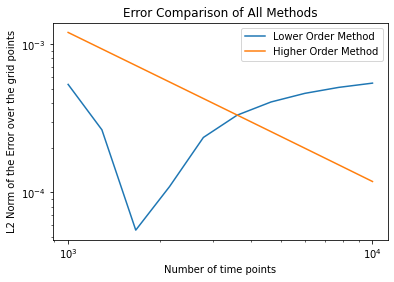

In [66]:
grid = np.linspace(0,1,40)
initial = np.sin(np.pi*grid)
number_time_points = np.logspace(3,4,10).astype(int)

lower_order_method = []
higher_order_method = []

for n in number_time_points:
    time = np.linspace(0,0.2,n)
    lower_order_method.append(np.array(fd.FiniteElements_Burgers(nu=1,grid=grid,time=time,initial_conditions=initial)[-1]))
    higher_order_method.append(np.array(fd.FiniteElements_Burgers_Higher_Order(nu=1,grid=grid,time=time,initial_conditions=initial)[-1]))
    
analytic_soln = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 10, problem = 1)
analytic_soln = [i[0] for i in analytic_soln]    
    
lower_order_plot = []   
higher_order_plot = []  
for i in range(len(number_time_points)):
    lower_order_plot.append(np.linalg.norm(np.abs(lower_order_method[i]-analytic_soln),2))
    higher_order_plot.append(np.linalg.norm(np.abs(higher_order_method[i]-analytic_soln),2))
    
plt.pyplot.loglog(number_time_points,lower_order_plot,label="Lower Order Method")
plt.pyplot.loglog(number_time_points,higher_order_plot,label="Higher Order Method")
plt.pyplot.legend()
plt.pyplot.title("Error Comparison of All Methods")
plt.pyplot.xlabel("Number of time points")
plt.pyplot.ylabel("L2 Norm of the Error over the grid points")

Text(0, 0.5, 'L2 Norm of the Error over the grid points')

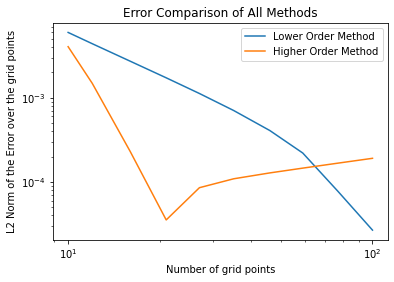

In [81]:
time = np.linspace(0,0.2,10000)
number_grid_points = np.logspace(1,2,10).astype(int)

lower_order_plot = []   
higher_order_plot = [] 

for n in number_grid_points:
    grid = np.linspace(0,1,n)
    initial = np.sin(np.pi*grid)
    
    analytic_soln = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 10, problem = 1)
    analytic_soln = [i[0] for i in analytic_soln]    
    
    lower_order_plot.append(np.linalg.norm(np.abs(fd.FiniteElements_Burgers(nu=1,grid=grid,time=time,initial_conditions=initial)[-1]-analytic_soln),2))
    higher_order_plot.append(np.linalg.norm(np.abs(fd.FiniteElements_Burgers_Higher_Order(nu=1,grid=grid,time=time,initial_conditions=initial)[-1]-analytic_soln),2))
    
plt.pyplot.loglog(number_grid_points,lower_order_plot,label="Lower Order Method")
plt.pyplot.loglog(number_grid_points,higher_order_plot,label="Higher Order Method")
plt.pyplot.legend()
plt.pyplot.title("Error Comparison of All Methods")
plt.pyplot.xlabel("Number of grid points")
plt.pyplot.ylabel("L2 Norm of the Error over the grid points")

### References

1. Inan, Bilge, and Ahmet Refik Bahadir. “Numerical Solution of the One-Dimensional Burgers’ Equation: Implicit and Fully Implicit Exponential Finite Difference Methods.” Pramana, vol. 81, no. 4, 2013, pp. 547–556., doi:10.1007/s12043-013-0599-z. 

2. Kadalbajoo, Mohan. K., and A. Awasthi. “A Numerical Method Based on Crank-Nicolson Scheme for Burgers’ Equation.” Applied Mathematics and Computation, vol. 182, no. 2, 2006, pp. 1430–1442., doi:10.1016/j.amc.2006.05.030. 

3. Landau, Rubin H., et al. Computational Physics: Problem Solving with Python. Wiley-VCH, 2015. 